# Introduction

I will explore the problem in following stages:

1.  **Hypothesis Generation** – understanding the problem better by brainstorming possible factors that can impact the outcome
2.  **Data Exploration** – looking at categorical and continuous feature summaries and making inferences about the data.
3.  **Data Cleaning** – imputing missing values in the data and checking for outliers
4.  **Feature Engineering** – modifying existing variables and creating new ones for analysis
5.  **Model Building** – making predictive models on the data


## 1. Hypothesis Generation

This is a very pivotal step in the process of analyzing data. This involves understanding the problem and making some hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis which we can potentially perform if data is available.

### The Problem Statement

Understanding the problem statement is the first and foremost step:

> In this competition, you will forecast the demand of a product for a given week, at a particular store. The dataset you are given consists of 9 weeks of sales transactions in Mexico. Every week, there are delivery trucks that deliver products to the vendors. Each transaction consists of sales and returns. Returns are the products that are unsold and expired. The demand for a product in a certain week is defined as the sales this week subtracted by the return next week.

So the idea is to find out the demand of a product (sales - returns) per client, and store which impacts the sales of a product. Let’s think about some of the analysis that can be done and come up with certain hypothesis.

### The Hypotheses

I came up with the following hypothesis while thinking about the problem. Since we’re talking about stores and products, lets make different sets for each.

**Store/Client Level Hypotheses:**

1.  **Town type:** Stores located in urban or Tier 1 towns should have higher sales because of the higher income levels of people there.
2.  **Population Density:** Stores located in densely populated areas should have higher sales because of more demand.
3.  **Store Capacity:** Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4.  **Competitors:** Stores having similar establishments nearby should have less sales because of more competition.
5.  **Marketing:** Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6.  **Location:** Stores located within popular marketplaces should have higher sales because of better access to customers.
7.  **Customer Behavior:** Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8.  **Ambiance:** Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.
9.  **Season:** Store should sell more after customer's pay day: after 15th or 30th of the month

**Product Level Hypotheses:**

1.  **Brand:** Branded products should have higher sales because of higher trust in the customer.
2.  **Packaging:** Products with good packaging can attract customers and sell more.
3.  **Utility:** Daily use products should have a higher tendency to sell as compared to the specific use products.
4.  **Display Area:** Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5.  **Visibility in Store:** The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6.  **Advertising:** Better advertising of products in the store will should higher sales in most cases.
7.  **Promotional Offers:** Products accompanied with attractive offers and discounts will sell more.


Lets move on to the data exploration where we will have a look at the data in detail.

## 2\. Data Exploration

We’ll be performing some basic data exploration here and come up with some inferences about the data.

The first step is to look at the data and try to identify the information which we hypothesized vs the available data. A comparison between the data dictionary on the competition page and out hypotheses is shown below:

![Image of Variables vs Hypothesis](files/../input-data/Variables_vs_Hyphotesis.png)

We can summarize the findings as:

** 9 Features Hypothesized but not found in actual data. **

** 5 Features Hypothesized as well as present in the data **

** 3 Features present in the data but not hypothesized. **


We invariable find features which we hypothesized, but data doesn’t carry and vice versa. We should look for open source data to fill the gaps if possible. Let’s start by loading the required libraries and data. 

In [3]:
import pandas as pd
import numpy as np
import time
import csv

_start_time = time.time()

def tic():
    global _start_time 
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))


In [2]:
#Read files:
tic()
train = pd.read_csv('input-data/train.csv',
                           dtype  = {'Semana': 'int8',
                                     'Producto_ID':'int32',
                                     'Cliente_ID':'int32',
                                     'Agencia_ID':'uint16',
                                     'Canal_ID':'int8',
                                     'Ruta_SAK':'int32',
                                     'Venta_hoy':'float32',
                                     'Venta_uni_hoy': 'int32',
                                     'Dev_uni_proxima':'int32',
                                     'Dev_proxima':'float32',
                                     'Demanda_uni_equil':'int32'})
test = pd.read_csv('input-data/test.csv',
                           dtype  = {'Semana': 'int8',
                                     'Producto_ID':'int32',
                                     'Cliente_ID':'int32',
                                     'Agencia_ID':'uint16',
                                     'Canal_ID':'int8',
                                     'Ruta_SAK':'int32'})
tac()

Time passed: 0hour:1min:35sec


In [6]:
train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.139999,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.520000,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.320000,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.520000,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.920000,0,0.0,3


In [7]:
test.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [3]:
#Since test dataframe is not the same as train dataframe, we make them equal by removing and adding columns
train.insert(0, 'id', np.nan)
test.insert(7, 'Venta_uni_hoy', np.nan)
test.insert(8, 'Venta_hoy', np.nan)
test.insert(9, 'Dev_uni_proxima', np.nan)
test.insert(10, 'Dev_proxima', np.nan)
test.insert(11, 'Demanda_uni_equil', np.nan)

In [4]:
train.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,NaN,3,1110,7,3301,15766,1212,3,25.139999,0,0.0,3
1,NaN,3,1110,7,3301,15766,1216,4,33.520000,0,0.0,4
2,NaN,3,1110,7,3301,15766,1238,4,39.320000,0,0.0,4
3,NaN,3,1110,7,3301,15766,1240,4,33.520000,0,0.0,4
4,NaN,3,1110,7,3301,15766,1242,3,22.920000,0,0.0,3


In [10]:
test.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,0,11,4037,1,2209,4639078,35305,NaN,NaN,NaN,NaN,NaN
1,1,11,2237,1,1226,4705135,1238,NaN,NaN,NaN,NaN,NaN
2,2,10,2045,1,2831,4549769,32940,NaN,NaN,NaN,NaN,NaN
3,3,11,1227,1,4448,4717855,43066,NaN,NaN,NaN,NaN,NaN
4,4,11,1219,1,1130,966351,1277,NaN,NaN,NaN,NaN,NaN


Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

In [5]:
tic()
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
tac()
print (train.shape, test.shape, data.shape)

Time passed: 0hour:0min:11sec
(74180464, 13) (6999251, 13) (81179715, 13)


Thus we can see that data has same #columns but rows equivalent to both test and train. Lets start by checking which columns contain missing values. (takes 32mins to run!)

In [9]:
data.apply(lambda x: sum(x.isnull()))

id                   74180464
Semana                      0
Agencia_ID                  0
Canal_ID                    0
Ruta_SAK                    0
Cliente_ID                  0
Producto_ID                 0
Venta_uni_hoy         6999251
Venta_hoy             6999251
Dev_uni_proxima       6999251
Dev_proxima           6999251
Demanda_uni_equil     6999251
source                      0
dtype: int64

There doesn't seem to be any missing values (other than the NaN we set on the test and train sets).

Lets look at some basic statistics for numerical variables.

In [10]:
data.describe()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
count,6999251.00000,81179715.000000,81179715.000000,81179715.000000,81179715.000000,8.117972e+07,81179715.000000,74180464.000000,74180464.000000,74180464.000000,74180464.000000,74180464.000000
mean,3499625.00000,6.341839,2533.745597,1.384793,2116.852025,1.803586e+06,20954.817836,7.310163,68.544523,0.130258,1.243248,7.224564
std,2020509.86883,2.313453,4069.579106,1.467666,1488.853067,2.406086e+06,18670.562503,21.967337,338.979516,29.323204,39.215523,21.771193
min,0.00000,3.000000,1110.000000,1.000000,1.000000,2.600000e+01,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1749812.50000,4.000000,1311.000000,1.000000,1161.000000,3.567150e+05,1242.000000,2.000000,16.760000,0.000000,0.000000,2.000000
50%,3499625.00000,6.000000,1613.000000,1.000000,1286.000000,1.193935e+06,30549.000000,3.000000,30.000000,0.000000,0.000000,3.000000
75%,5249437.50000,8.000000,2036.000000,1.000000,2803.000000,2.372538e+06,37569.000000,7.000000,56.099998,0.000000,0.000000,6.000000
max,6999250.00000,11.000000,25759.000000,11.000000,9991.000000,2.015152e+09,49997.000000,7200.000000,647360.000000,250000.000000,130760.000000,5000.000000


Some observations:

   Looking at Demanda_uni_equil (our target), or the amount of product sold per week, we find interesting things:
   
   **1)** The average is 7.22, so in average there is 7 units per week per store sold.
   
   **2)** Looking at the max of 5000, it looks very far fro the mean (3 orders of magnitude), so we must check for an outlier here or a store that is crazy different from the rest.
   
   **3)** Same behaviour we find on Dev_uni_proxima, Venta_hoy and Venta_uni_hoy
   
Looking at the nice data analysis made in R by Faviens, here: https://www.kaggle.com/fabienvs/grupo-bimbo-inventory-demand/notebook-8a62eda039a3b0b944cf/notebook we corroborate the outlier(s):
There is a massive client: Puebla Remision
   
![Image of size of Customers]( https://www.kaggle.io/svf/267812/783a24d1dd546819a44914f996b249e8/__results___files/figure-html/unnamed-chunk-16-1.png)
   

Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [11]:
data.apply(lambda x: len(x.unique()))

id                   6999252
Semana                     9
Agencia_ID               552
Canal_ID                   9
Ruta_SAK                3620
Cliente_ID            890267
Producto_ID             1833
Venta_uni_hoy           2117
Venta_hoy              73516
Dev_uni_proxima          559
Dev_proxima            14241
Demanda_uni_equil       2092
source                     2
dtype: int64

So, in train and test sets, we have 552 Agencies(depots), 890k clients (we might have some repeated clients due to typos when enterind data), 1833 products (we might have some repeated products here based on typos) and 3620 routes

## 3\. Data Cleaning

This step typically involves imputing missing values and treating outliers. As we saw before, there are no missing values. Regarding outliers, there seem to be an obvious one, but we are going to see later on if its necessary to treat it differently.

My initial reaction would be to see if anything with the word REMISION is on the test set. if not, then delete it. See this discussion: https://www.kaggle.com/c/grupo-bimbo-inventory-demand/forums/t/22037/puebla-remission/126053

In [ ]:
#Let's find out who are the clients with the word REMISION on it
client_name = pd.read_csv('files/../input-data/cliente_tabla.csv')
cliente_id_name_train = pd.merge(train,client_name, on='Cliente_ID')
cliente_id_name_test = pd.merge(test,client_name, on='Cliente_ID')

In [ ]:
cliente_id_name_train.head()

In [ ]:
cliente_id_name_train[cliente_id_name_train.NombreCliente.str.contains('REMISION')].count()

As we can see above, the word "REMISION" shows up 140k times on the train set. Let's see the test set:

In [ ]:
cliente_id_name_test[cliente_id_name_test.NombreCliente.str.contains('REMISION')].count()

12k rows shows up the word REMISION on the test set. This implies that it has to be predicted as well. We cannot eliminate it.

## 4\. Feature Engineering

We explored some nuances in the data in the data exploration section. Lets move on to resolving them and making our data ready for analysis. We will also create some new variables using the existing ones in this section.

### Step 1: Create a broad category of Brand of item (brand hypothesis)
Let's preprocess products a little bit. I borrowed some of the preprocessing from here: https://www.kaggle.com/vykhand/grupo-bimbo-inventory-demand/exploring-products

In [6]:
products  =  pd.read_csv("input-data/producto_tabla.csv")
products  =  pd.read_csv("input-data/producto_tabla.csv")
#products['short_name'] = products.NombreProducto.str.extract('^(\D*)', expand=False)#python 2.7
products['short_name'] = products.NombreProducto.str.extract('^(\D*)')#python 3.0
#products['brand'] = products.NombreProducto.str.extract('^.+\s(\D+) \d+$', expand=False)
products['brand'] = products.NombreProducto.str.extract('^.+\s(\D+) \d+$')
#w = products.NombreProducto.str.extract('(\d+)(Kg|g)', expand=True)
w = products.NombreProducto.str.extract('(\d+)(Kg|g)')
products['weight'] = w[0].astype('float')*w[1].map({'Kg':1000, 'g':1})
#products['pieces'] =  products.NombreProducto.str.extract('(\d+)p ', expand=False).astype('float')
products['pieces'] =  products.NombreProducto.str.extract('(\d+)p ').astype('float')
products.head()

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be chang

,Producto_ID,NombreProducto,short_name,brand,weight,pieces
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,IDENTIFICADO,NaN,NaN
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NES,750.0,NaN
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,BIM,480.0,6.0
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,LON,170.0,NaN
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,TR,45.0,4.0


In [7]:
products.tail()

,Producto_ID,NombreProducto,short_name,brand,weight,pieces
2587,49992,Tostado Integral 180g MTA WON 49992,Tostado Integral,WON,180.0,NaN
2588,49993,Tostado Integral 180g TAB WON 49993,Tostado Integral,WON,180.0,NaN
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994,Tostado Int,WON,200.0,NaN
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996,Tostado Int,WON,200.0,NaN
2591,49997,Tostado Int 0pct Grasa Azuc 200g TAB WON 49997,Tostado Int,WON,200.0,NaN


In [8]:
products.brand.value_counts()

BIM             679
MLA             657
TR              257
LAR             182
GBI             130
WON             117
DH               95
LON              83
SAN              66
MR               64
ORO              44
CC               33
SL               32
BAR              31
RIC              20
SUA              20
MP               10
SUN               9
JMX               8
SKD               7
MCM               5
COR               5
THO               4
NAI               4
NES               3
TRI               3
MSK               2
CHK               2
KOD               2
BRL               2
PUL               2
VR                1
GV                1
DIF               1
BRE               1
AM                1
EMB               1
MTB               1
CAR               1
AV                1
NEC               1
IDENTIFICADO      1
VER               1
LC                1
Name: brand, dtype: int64

In [9]:
products.brand.nunique()

44

In [10]:
products_id_brand  = products[['Producto_ID', 'brand']].copy()

In [11]:
products_id_brand.tail()

,Producto_ID,brand
2587,49992,WON
2588,49993,WON
2589,49994,WON
2590,49996,WON
2591,49997,WON


In [12]:
data = pd.merge(data, products_id_brand, on='Producto_ID')

In [13]:
data.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,source,brand
0,NaN,3,1110,7,3301,15766,1212,3.0,25.139999,0.0,0.0,3.0,train,BIM
1,NaN,3,1110,7,3301,73838,1212,3.0,25.139999,0.0,0.0,3.0,train,BIM
2,NaN,3,1110,7,3301,73844,1212,2.0,16.760000,0.0,0.0,2.0,train,BIM
3,NaN,3,1110,7,3301,198780,1212,4.0,33.520000,0.0,0.0,4.0,train,BIM
4,NaN,3,1110,7,3301,1159580,1212,3.0,25.139999,0.0,0.0,3.0,train,BIM


### Step 2: Create clusters of Products (utility hypothesis) - ramdonly pick 30 clusters

In [14]:
#Read files:
product_clusters = pd.read_csv('input-data/producto_clusters.csv')

In [15]:
product_clusters.tail()

,Producto_ID,NombreProducto,product_shortname,cluster
2586,49992,Tostado Integral 180g MTA WON 49992,Tostado Integral 180g,4
2587,49993,Tostado Integral 180g TAB WON 49993,Tostado Integral 180g,4
2588,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994,Tostado Int 0pct Grasa Azuc 200g,4
2589,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996,Tostado Int 0pct Grasa Azuc 200g,4
2590,49997,Tostado Int 0pct Grasa Azuc 200g TAB WON 49997,Tostado Int 0pct Grasa Azuc 200g,4


In [16]:
print (product_clusters["cluster"].value_counts())

1     204
14    137
10    136
11    124
4     118
13    109
23    103
24    101
19     99
17     93
16     89
8      88
25     85
30     81
22     78
20     75
15     73
9      73
27     71
5      70
2      68
6      65
3      63
26     62
7      61
28     60
12     60
18     59
29     53
21     33
Name: cluster, dtype: int64


In [17]:
products_id_clusters = product_clusters[['Producto_ID', 'cluster']].copy()

In [18]:
products_id_clusters.tail()

,Producto_ID,cluster
2586,49992,4
2587,49993,4
2588,49994,4
2589,49996,4
2590,49997,4


In [19]:
data = pd.merge(data, products_id_clusters, on='Producto_ID')

In [20]:
data.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,source,brand,cluster
0,NaN,3,1110,7,3301,15766,1212,3.0,25.139999,0.0,0.0,3.0,train,BIM,18
1,NaN,3,1110,7,3301,73838,1212,3.0,25.139999,0.0,0.0,3.0,train,BIM,18
2,NaN,3,1110,7,3301,73844,1212,2.0,16.760000,0.0,0.0,2.0,train,BIM,18
3,NaN,3,1110,7,3301,198780,1212,4.0,33.520000,0.0,0.0,4.0,train,BIM,18
4,NaN,3,1110,7,3301,1159580,1212,3.0,25.139999,0.0,0.0,3.0,train,BIM,18


### Step 3: Create a category of Size of store based on Number of Agencies and Routes and Sales Channels that serve the store

In [21]:
#Determine pivot table
Rutas_per_store = data.pivot_table(values=["Ruta_SAK"], index=["Cliente_ID"], aggfunc=pd.Series.nunique)
Rutas_per_store.head()

,Ruta_SAK
Cliente_ID,
26,6
60,22
65,3
101,1
105,1


In [22]:
Rutas_per_store.describe()

,Ruta_SAK
count,890267.000000
mean,2.565480
std,1.574041
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,57.000000


In [29]:
Agencies_per_store = data.pivot_table(values=["Agencia_ID"], index=["Cliente_ID"], aggfunc=pd.Series.nunique)
Agencies_per_store.head()

,Agencia_ID
Cliente_ID,
26,2
60,2
65,2
101,1
105,1


In [30]:
Agencies_per_store.describe()

,Agencia_ID
count,890267.000000
mean,1.050984
std,0.247574
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,63.000000


In [31]:
Canals_per_store = data.pivot_table(values=["Canal_ID"], index=["Cliente_ID"], aggfunc=pd.Series.nunique)
Canals_per_store.head()

,Canal_ID
Cliente_ID,
26,1
60,1
65,1
101,1
105,1


In [32]:
Canals_per_store.describe()

,Canal_ID
count,890267.000000
mean,1.008145
std,0.090850
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


It doesn't look that we can Bin on Canal_ID or Agencia_ID, but it does look like Ruta_SAK is a good option!"

In [23]:
Rutas_per_store.rename(columns={'Ruta_SAK': 'Qty_Ruta_SAK'}, inplace=True)

In [24]:
Rutas_per_store.head()

,Qty_Ruta_SAK
Cliente_ID,
26,6
60,22
65,3
101,1
105,1


In [25]:
#Mergin Routa_Sak's per client to data df
data = pd.merge(data,Rutas_per_store,right_index=True, left_on='Cliente_ID')

In [26]:
data.tail()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,source,brand,cluster,Qty_Ruta_SAK
81171017,6961326.0,11,3213,1,2806,4680305,37495,NaN,NaN,NaN,NaN,NaN,test,MLA,26,1
81171321,816894.0,10,1445,1,1225,2430831,36673,NaN,NaN,NaN,NaN,NaN,test,TR,8,1
81171960,3256237.0,11,1445,1,1225,2430831,36673,NaN,NaN,NaN,NaN,NaN,test,TR,8,1
81176921,5500823.0,11,1338,1,5002,4741815,37202,NaN,NaN,NaN,NaN,NaN,test,TR,24,1
81179136,648237.0,11,2092,11,3903,4765705,36524,NaN,NaN,NaN,NaN,NaN,test,TR,8,1


In [27]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning Qty_Ruta_SAK:
cut_points = [2,4,10]
labels = ["low","medium","high","very high"]
data["Qty_Ruta_SAK_Bin"] = binning(data["Qty_Ruta_SAK"], cut_points, labels)
print (pd.value_counts(data["Qty_Ruta_SAK_Bin"], sort=False))

low          24879666
medium       28933020
high         27203419
very high      163610
Name: Qty_Ruta_SAK_Bin, dtype: int64


In [28]:
#We don't need Qty_Ruta_Sak anymore
data.drop(['Qty_Ruta_SAK'],axis=1,inplace=True)

In [29]:
data.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,source,brand,cluster,Qty_Ruta_SAK_Bin
0,NaN,3,1110,7,3301,15766,1212,3.0,25.139999,0.0,0.0,3.0,train,BIM,18,low
193564,NaN,4,1110,7,3301,15766,1212,4.0,33.520000,0.0,0.0,4.0,train,BIM,18,low
373703,NaN,5,1110,7,3301,15766,1212,5.0,41.900002,0.0,0.0,5.0,train,BIM,18,low
877686,NaN,8,1110,7,3301,15766,1212,4.0,33.520000,0.0,0.0,4.0,train,BIM,18,low
1038138,NaN,9,1110,7,3301,15766,1212,1.0,8.380000,0.0,0.0,1.0,train,BIM,18,low


### Step 4: Create a category of location based on zip code (embedded on town table)

In [30]:
import re 
import os
import time
towns = pd.read_csv("input-data/town_state.csv")
L = lambda x: list(map(int, re.findall('\d+', x)))[0]
towns['ZipCode'] = towns.Town.apply(L) 
towns['ZipCode'] = np.uint16(towns['ZipCode'])

In [31]:
zipcodes_df = towns[['Agencia_ID', 'ZipCode']].copy()

In [32]:
zipcodes_df.head()

,Agencia_ID,ZipCode
0,1110,2008
1,1111,2002
2,1112,2004
3,1113,2008
4,1114,2029


In [33]:
data = pd.merge(data, zipcodes_df, on='Agencia_ID')

In [34]:
data.tail()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,source,brand,cluster,Qty_Ruta_SAK_Bin,ZipCode
81179710,NaN,5,1160,8,3602,932176,2438,1000.0,647360.0,0.0,0.0,1000.0,train,BIM,9,low,2089
81179711,NaN,6,1160,8,3602,932176,2438,600.0,388416.0,0.0,0.0,600.0,train,BIM,9,low,2089
81179712,NaN,7,1160,8,3602,932176,2438,400.0,258944.0,0.0,0.0,400.0,train,BIM,9,low,2089
81179713,NaN,8,1160,8,3602,932176,2438,400.0,258944.0,0.0,0.0,400.0,train,BIM,9,low,2089
81179714,NaN,9,1160,8,3602,932176,2438,400.0,258944.0,0.0,0.0,400.0,train,BIM,9,low,2089


In [35]:
data.apply(lambda x: len(x.unique()))

id                   6999252
Semana                     9
Agencia_ID               552
Canal_ID                   9
Ruta_SAK                3620
Cliente_ID            890267
Producto_ID             1833
Venta_uni_hoy           2117
Venta_hoy              73516
Dev_uni_proxima          559
Dev_proxima            14241
Demanda_uni_equil       2092
source                     2
brand                     33
cluster                   30
Qty_Ruta_SAK_Bin           4
ZipCode                  254
dtype: int64

### TODO - Step 5: Up sampling of brands

###  Step 6: Calculate Features related to Demand(sales) - Product/Client demand, Product demand, Global demand.

This is a modification of this kaggle script: https://www.kaggle.com/armalali/grupo-bimbo-inventory-demand/benchmark-medians/comments
I'm changing it to  exp mean of the log, instead of just the mean. It results on better RSMLE. see: 
https://www.kaggle.com/apapiu/grupo-bimbo-inventory-demand/mean-vs-medians-a-mathy-approach

In [36]:
#log transformed mean
def log1p_mean (x):
    return np.expm1(np.mean(np.log1p(x)))

tic()
global_log1p_mean = log1p_mean(train['Demanda_uni_equil'])
prod_log1p_mean = train.groupby('Producto_ID').agg({'Demanda_uni_equil': lambda x: log1p_mean(x)})
prod_client_log1p_mean = train.groupby(['Producto_ID', 'Cliente_ID']).agg({'Demanda_uni_equil':  lambda x: log1p_mean(x)})

prod_log1p_mean_dict = prod_log1p_mean.to_dict()
prod_client_log1p_mean_dict = prod_client_log1p_mean.to_dict()

tac()

Time passed: 1hour:11min:49sec


In [37]:
def gen_log1p_mean_feature(key):
    key = tuple(key)
    product = key[0]
    client = key[1]
    try:
        val = prod_client_log1p_mean_dict['Demanda_uni_equil'][(product,client)]
        
    except:
        try:
            val = prod_log1p_mean_dict['Demanda_uni_equil'][(product)]
        except:
            
            val = global_log1p_mean
            
    return val

In [38]:
print (global_log1p_mean)

3.96747983777


In [39]:
prod_log1p_mean.head()

,Demanda_uni_equil
Producto_ID,
41,82.796566
53,58.309573
72,4.152047
73,2.005731
100,3.324174


In [40]:
prod_client_log1p_mean.head()

Demanda_uni_equil
Producto_ID Cliente_ID                   
41          146030              57.509851
            465617               0.000000
            681747            1505.912233
            684023              54.015921
            685079               0.000000

In [41]:
tic()
data['log1p_mean'] = data[['Producto_ID', 'Cliente_ID']].apply(lambda x:gen_log1p_mean_feature(x), axis=1)
tac()

Time passed: 0hour:33min:25sec


In [42]:
data.describe()

/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,cluster,ZipCode,log1p_mean
count,6.999251e+06,8.117972e+07,8.117972e+07,8.117972e+07,8.117972e+07,8.117972e+07,8.117972e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,7.418046e+07,8.117972e+07,8.117972e+07,8.117972e+07
mean,3.499625e+06,6.341839e+00,2.533746e+03,1.384793e+00,2.116852e+03,1.803586e+06,2.095482e+04,7.310163e+00,6.854452e+01,1.302577e-01,1.243248e+00,7.224564e+00,1.367362e+01,2.255970e+03,6.702034e+00
std,2.020510e+06,2.313453e+00,4.069579e+03,1.467666e+00,1.488853e+03,2.406086e+06,1.867056e+04,2.196734e+01,3.389795e+02,2.932320e+01,3.921552e+01,2.177119e+01,7.471933e+00,1.756178e+02,1.850599e+01
min,0.000000e+00,3.000000e+00,1.110000e+03,1.000000e+00,1.000000e+00,2.600000e+01,4.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.001000e+03,0.000000e+00
25%,NaN,4.000000e+00,1.311000e+03,1.000000e+00,1.161000e+03,3.567150e+05,1.242000e+03,NaN,NaN,NaN,NaN,NaN,9.000000e+00,2.070000e+03,2.000000e+00
50%,NaN,6.000000e+00,1.613000e+03,1.000000e+00,1.286000e+03,1.193935e+06,3.054900e+04,NaN,NaN,NaN,NaN,NaN,1.400000e+01,2.271000e+03,3.281390e+00
75%,NaN,8.000000e+00,2.036000e+03,1.000000e+00,2.803000e+03,2.372538e+06,3.756900e+04,NaN,NaN,NaN,NaN,NaN,1.900000e+01,2.386000e+03,6.253528e+00
max,6.999250e+06,1.100000e+01,2.575900e+04,1.100000e+01,9.991000e+03,2.015152e+09,4.999700e+04,7.200000e+03,6.473600e+05,2.500000e+05,1.307600e+05,5.000000e+03,3.000000e+01,3.216000e+03,5.000000e+03


In [43]:
data.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,source,brand,cluster,Qty_Ruta_SAK_Bin,ZipCode,log1p_mean
0,NaN,3,1110,7,3301,15766,1212,3.0,25.139999,0.0,0.0,3.0,train,BIM,18,low,2008,3.128918
1,NaN,4,1110,7,3301,15766,1212,4.0,33.520000,0.0,0.0,4.0,train,BIM,18,low,2008,3.128918
2,NaN,5,1110,7,3301,15766,1212,5.0,41.900002,0.0,0.0,5.0,train,BIM,18,low,2008,3.128918
3,NaN,8,1110,7,3301,15766,1212,4.0,33.520000,0.0,0.0,4.0,train,BIM,18,low,2008,3.128918
4,NaN,9,1110,7,3301,15766,1212,1.0,8.380000,0.0,0.0,1.0,train,BIM,18,low,2008,3.128918


### TODO Step 7: Lag Features - Demand per client-product pair for prior weeks
Based on this blog: http://blog.nycdatascience.com/student-works/predicting-demand-historical-sales-data-grupo-bimbo-kaggle-competition/

As this script said: https://www.kaggle.com/bpavlyshenko/grupo-bimbo-inventory-demand/bimbo-xgboost-r-script-lb-0-457/code
It is important to know what were the previous weeks sales. If the previous week, too many products were supplied and they were not sold, the next week this product amount, supplied to the same store, will be decreased. So it is very important to included lag values of target variable as a feature to predict the next sales.

### Step 8: Numerical and One-Hot Coding of Categorical variables
Since scikit-learn accepts only numerical variables, so i have to convert all categories of nominal variables into numeric types.

Lets start with coding all low cardinality nominal categorical variables (brand, Qty_Ruta_SAK_Bin)  as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.

In [44]:
print (data.dtypes)

id                   float64
Semana                  int8
Agencia_ID            uint16
Canal_ID                int8
Ruta_SAK               int32
Cliente_ID             int32
Producto_ID            int32
Venta_uni_hoy        float64
Venta_hoy            float64
Dev_uni_proxima      float64
Dev_proxima          float64
Demanda_uni_equil    float64
source                object
brand                 object
cluster                int64
Qty_Ruta_SAK_Bin      object
ZipCode               uint16
log1p_mean           float64
dtype: object


In [45]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var_mod = ['brand', 'Qty_Ruta_SAK_Bin']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [46]:
data.head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,source,brand,cluster,Qty_Ruta_SAK_Bin,ZipCode,log1p_mean
0,NaN,3,1110,7,3301,15766,1212,3.0,25.139999,0.0,0.0,3.0,train,2,18,1,2008,3.128918
1,NaN,4,1110,7,3301,15766,1212,4.0,33.520000,0.0,0.0,4.0,train,2,18,1,2008,3.128918
2,NaN,5,1110,7,3301,15766,1212,5.0,41.900002,0.0,0.0,5.0,train,2,18,1,2008,3.128918
3,NaN,8,1110,7,3301,15766,1212,4.0,33.520000,0.0,0.0,4.0,train,2,18,1,2008,3.128918
4,NaN,9,1110,7,3301,15766,1212,1.0,8.380000,0.0,0.0,1.0,train,2,18,1,2008,3.128918


One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the 'cluster' variable has 30 categories. One hot coding will remove this variable and generate 30 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present).
Categorical variables are intentionally (for censorship) or implicitly encoded as numerical variables in order to be used as features in any given model.

e.g. [house, car, tooth, car] becomes [0,1,2,1].

This imparts an ordinal property to the variable, i.e. house < car < tooth.

As this is ordinal characteristic is usually not desired, one hot encoding is necessary for the proper representation of the distinct elements of the variable.

-- This can be done using ‘get_dummies’ function of Pandas.


In [ ]:
#One Hot Coding: you need python 3 and 128GB ram for this
tic()
data = pd.get_dummies(data, columns=['Canal_ID','brand','cluster','Qty_Ruta_SAK_Bin'])
tac()

Lets look at the datatypes of columns now:

In [49]:
data.dtypes

id                   float64
Semana                  int8
Agencia_ID            uint16
Canal_ID                int8
Ruta_SAK               int32
Cliente_ID             int32
Producto_ID            int32
Venta_uni_hoy        float64
Venta_hoy            float64
Dev_uni_proxima      float64
Dev_proxima          float64
Demanda_uni_equil    float64
source                object
brand                  int64
cluster                int64
Qty_Ruta_SAK_Bin       int64
ZipCode               uint16
log1p_mean           float64
dtype: object

### Step 8: Exporting Data

In [51]:
#Divide into test and train:
import csv
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
train.drop(['source','id','Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima'],axis=1,inplace=True)
test.drop(['source','Venta_uni_hoy','Venta_hoy','Dev_uni_proxima', 'Dev_proxima','Demanda_uni_equil'],axis=1,inplace=True)

#Export files as modified versions:
tic()
train.to_csv("./input-data/train_modified.csv", index=False, quoting=csv.QUOTE_NONE)
test.to_csv("./input-data/test_modified.csv", index=False, quoting=csv.QUOTE_NONE)
tac()

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Time passed: 0hour:9min:14sec


## 4\. Model Building

Now that we have the data ready, its time to start making predictive models. I will go through 5 scikit-learn simple models including linear regression, decision tree and random forest.

Since I’ll be making many models, instead of repeating the codes again and again, I would like to define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates submission.

I'll do the same thing later with H2O and XGboost

In [1]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import math

#   rmsle - error function used in LB
def rmsle_func(actual, predicted):
    return np.sqrt(msle(actual, predicted))
def msle(actual, predicted):
    return np.mean(sle(actual, predicted))
def sle(actual, predicted):
    return (np.power(np.log(np.array(actual)+1) -  np.log(np.maximum(0,np.array(predicted))+1), 2))

def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(max(0,y_pred[i]) + 1) - math.log(max(0,y[i]) + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

#Define target and ID columns:
target = 'Demanda_uni_equil'
IDcol = 'id'
from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dval, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    y = alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Predict validation (holdout) set:
    dval_predictions = alg.predict(dval[predictors])

    #Perform cross-validation:
    #cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=2, scoring='mean_squared_error')
    #cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    #print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    #print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
      
    print ('RMSLE TRAIN: ', rmsle_func(dtrain[target].values, dtrain_predictions))
    print ('RMSLE VAL: ', rmsle_func(dval[target].values, dval_predictions))
    #print ('rmsle: ', rmsle(dtrain[target].values, dtrain_predictions))
    print ('RMSE TRAIN', np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ('RMSE VAL', np.sqrt(metrics.mean_squared_error(dval[target].values, dval_predictions)))
        
      
        
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    
    #Export submission file:
    #IDcol.append(target)
    #submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission = dtest[[IDcol,target]].copy()
    submission[IDcol] = submission[IDcol].astype(int)
    submission.to_csv(filename, index=False)
    

In [ ]:
#now we load our modified train and test set

tic()
#train = pd.read_csv('./input-data/train_modified.csv', nrows = 500000)
#test = pd.read_csv('./input-data/test_modified.csv', nrows = 500000)
train = pd.read_csv('./input-data/train_modified.csv',
                    dtype = {'Semana': 'int8',
                            'Agencia_ID': 'uint16',
                            'Canal_ID': 'int8',
                            'Ruta_SAK': 'int32',
                            'Cliente_ID': 'int32',
                            'Producto_ID': 'int32',
                            'Venta_uni_hoy': 'float64',
                            'Venta_hoy': 'float64',
                            'Dev_uni_proxima': 'float64',
                            'Dev_proxima': 'float64',
                            'Demanda_uni_equil': 'float64',
                            'brand': 'uint16',
                            'cluster': 'uint16',
                            'Qty_Ruta_SAK_Bin': 'int8',
                            'ZipCode': 'uint16',
                            'log1p_mean': 'float64'},
                   )

                    
test = pd.read_csv('./input-data/test_modified.csv',
                    dtype = {'id': 'uint32',
                            'Semana': 'int8',
                            'Agencia_ID': 'uint16',
                            'Canal_ID': 'int8',
                            'Ruta_SAK': 'int32',
                            'Cliente_ID': 'int32',
                            'Producto_ID': 'int32',
                            'brand': 'uint16',
                            'cluster': 'uint16',
                            'Qty_Ruta_SAK_Bin': 'int8',
                            'ZipCode': 'uint16',
                            'log1p_mean': 'float64'},
                      )
tac()

Time passed: 0hour:1min:7sec


In [ ]:
# We split the train set to get a validation set
tic()
val = train[train.Semana > 8] # Weeks 9
train = train[train.Semana <=8] # Weeks 3,4,5,6,7,8
tac()

In [ ]:
test.head()

### Linear Regression Model

Lets make our first linear-regression model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+[IDcol]]
# print predictors
alg1 = LinearRegression(normalize=True)
tic()
modelfit(alg1, train, val, test, predictors, target, IDcol, 'alg1.csv')
tac()
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

We can see this is better than baseline model. But if you notice the coefficients, they are very large in magnitude which signifies overfitting. To cater to this, lets use a ridge regression model.

### Ridge Regression Model:

In [ ]:
predictors = [x for x in train.columns if x not in [target]+[IDcol]]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, val, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

Though the regression coefficient look better now, the score is about the same. You can tune the parameters of the model for slightly better results but I don’t think there will be a significant improvement. Even the cross-validation score is same so we can’t expect way better performance.

### Decision Tree Model

Lets try out a decision tree model and see if we get something better.


Model Report
RMSLE TRAIN:  0.332548576688
RMSLE VAL:  0.332544025406
RMSE TRAIN 8.37509930709
RMSE VAL 8.73364507717
Time passed: 0hour:41min:39sec


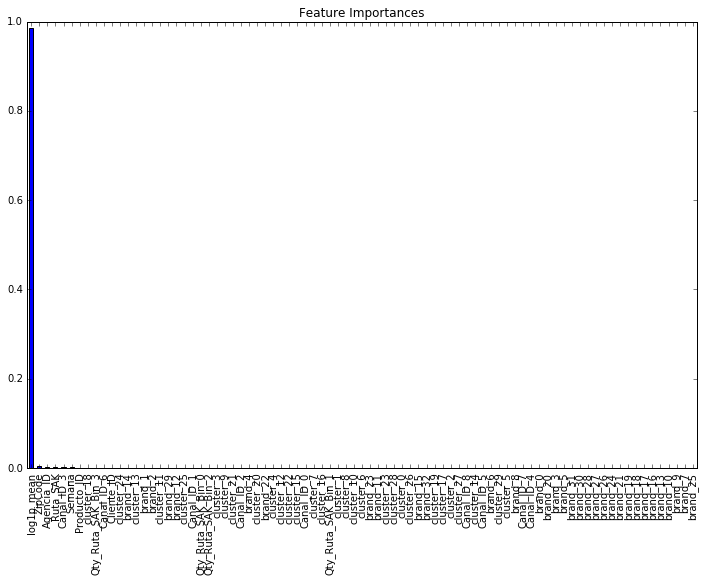

In [76]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+[IDcol]]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
tic()
modelfit(alg3, train, val, test, predictors, target, IDcol, 'alg3.csv')
tac()
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

Here you can see that the RMSE is 1058 and the mean CV error is 1091. This tells us that the model is slightly overfitting. Lets try making a decision tree with just top 10 variables, a max_depth of 8 and min_samples_leaf as 150.

In [ ]:
predictors = ['Producto_ID','Canal_ID_2','Canal_ID_5','Ruta_SAK','ZipCode','Cliente_ID','cluster_19','cluster_21','brand_14','Agencia_ID']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
tic()
modelfit(alg4, train, val, test, predictors, target, IDcol, 'alg4.csv')
tac()
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

You can fine tune the model further using other parameters. I’ll leave this to you.

### Random Forest Model

Lets try a random forest model as well and see if we get some improvements. Read more about random forest [here](http://www.analyticsvidhya.com/blog/2015/09/random-forest-algorithm-multiple-challenges/).

In [78]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+[IDcol]]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=25, min_samples_leaf=100,n_jobs=-1)
tic()
modelfit(alg5, train, val, test, predictors, target, IDcol, 'alg5.csv')
tac()
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

MemoryError: 

Now it is time to complicate things and use H2O GBM and RF with grid search, and of course XGBoost.

Thi isi a great article for tunning XGboost: http://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

# H2O - GLM, GBM, NN, RF

In [14]:
import h2o
import time
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator


from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [16]:
# Connect to a cluster
h2o.init()

Connecting to H2O server at http://localhost:54321... successful!


H2O cluster uptime:,12 secs
H2O cluster version:,3.10.0.1
H2O cluster version age:,1 day
H2O cluster name:,pablomarin
H2O cluster total nodes:,1
H2O cluster free memory:,10.67 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster is healthy:,True
H2O cluster is locked:,False
H2O connection url:,http://localhost:54321


In [ ]:
train_hex = h2o.H2OFrame(train)

In [37]:
test_hex = h2o.H2OFrame(test)

In [ ]:
train_hex.describe()

In [ ]:
# ----------
# Fit a model on train; using test and validation

# Function for doing class test/train/holdout split
def fit_score(data):
  global gbm0,drf0,glm0,dl0

  val = data[data["C1"] > 8] # Weeks 9
  train = data[data["C1"] <=8] # Weeks 3,4,5,6,7,8

  print("Training data has",train.ncol,"columns and",train.nrow,"rows, Validation data has",val.nrow,"rows")
  predictors_names = train.names
  predictors_names.remove("C6")
  
  # Run GBM
  s = time.time()
  
  gbm0 = H2OGradientBoostingEstimator(ntrees=500, # 500 works well
                                      max_depth=6,
                                      learn_rate=0.1)
    

  gbm0.train(x               =predictors_names,
             y               ="C6",
             training_frame  =train,
             validation_frame=val)

  gbm_elapsed = time.time() - s

  # Run DRF
  s = time.time()
    
  drf0 = H2ORandomForestEstimator(ntrees=250, max_depth=30)

  drf0.train(x               =predictors_names,
             y               ="C6",
             training_frame  =train,
             validation_frame=val)
    
  drf_elapsed = time.time() - s 
    
    
  # Run GLM
  s = time.time()

  glm0 = H2OGeneralizedLinearEstimator(Lambda=[1e-5], family="poisson")
    
  glm0.train(x               =predictors_names,
             y               ="C6",
             training_frame  =train,
             validation_frame=val)

  glm_elapsed = time.time() - s
  
  # Run DL
  s = time.time()

  dl0 = H2ODeepLearningEstimator(hidden=[50,50,50,50], epochs=50)
    
  dl0.train(x               =predictors_names,
            y               ="C6",
            training_frame  =train,
            validation_frame=val)
    
  dl_elapsed = time.time() - s
  
  # ----------
  # 4- Score on holdout set & report
  train_r2_gbm = gbm0.model_performance(train).r2()
  val_r2_gbm  = gbm0.model_performance(val).r2()
  
  train_r2_drf = drf0.model_performance(train).r2()
  val_r2_drf  = drf0.model_performance(val).r2()
  
  train_r2_glm = glm0.model_performance(train).r2()
  val_r2_glm  = glm0.model_performance(val).r2()
    
  train_r2_dl = dl0.model_performance(train).r2()
  val_r2_dl  = dl0.model_performance(val).r2()
    
  # make a pretty HTML table printout of the results

  header = ["Model", "R2 TRAIN", "R2 TEST", "Model Training Time (s)"]
  table  = [
            ["GBM", train_r2_gbm, val_r2_gbm, round(gbm_elapsed,3)],
            ["DRF", train_r2_drf, val_r2_drf, round(drf_elapsed,3)],
            ["GLM", train_r2_glm, val_r2_glm, round(glm_elapsed,3)],
            ["DL ", train_r2_dl,  val_r2_dl,  round(dl_elapsed,3) ],
           ]
  h2o.display.H2ODisplay(table,header)
  # --------------

In [ ]:
# Split the data (into test & train), fit some models and predict on the holdout data
fit_score(train_hex)